In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import ConvLSTM2D
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv('/content/drive/My Drive/csv_때리기/input1.csv')
data = np.transpose(data)
loaded = data[:30]

for i in range(2,207+1):
  filename1 = '/content/drive/My Drive/csv_때리기/input{}.csv'.format(i)
  filename2 = '/content/drive/My Drive/csv_쓰다듬기/input_쓰다듬기{}.csv'.format(i)
  data = pd.read_csv(filename1)
  data = np.transpose(data)
  loaded = np.concatenate((loaded, data[:30]), axis=0)

  data = pd.read_csv(filename2)
  data = np.transpose(data)
  loaded = np.concatenate((loaded, data[:30]), axis=0)
  
    
loaded = np.reshape(loaded, (413,30,51))

print(loaded.shape)

(413, 30, 51)


In [12]:
X = loaded[:,:,:50]
y = np.ones((413,1))

for i in range(413) :
  if i %2 == 0:
    y[i] = 0

In [15]:
X_train = X[:330,:,:]
X_test = X[330:,:,:]
y_train = y[:330]
y_test = y[330:]

In [40]:

# All Includes

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import metrics
import keras

import os

In [41]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=128,
          input_shape=[X_train.shape[1], X_train.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['acc']
)

In [43]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/20
10/10 [==============================] - 6s 78ms/step - loss: nan - acc: 0.4983 - val_loss: nan - val_acc: 0.4848
Epoch 2/20
10/10 [==============================] - 0s 8ms/step - loss: nan - acc: 0.5017 - val_loss: nan - val_acc: 0.4848
Epoch 3/20
10/10 [==============================] - 0s 9ms/step - loss: nan - acc: 0.5017 - val_loss: nan - val_acc: 0.4848
Epoch 4/20
10/10 [==============================] - 0s 8ms/step - loss: nan - acc: 0.5017 - val_loss: nan - val_acc: 0.4848
Epoch 5/20
10/10 [==============================] - 0s 8ms/step - loss: nan - acc: 0.5017 - val_loss: nan - val_acc: 0.4848
Epoch 6/20
10/10 [==============================] - 0s 8ms/step - loss: nan - acc: 0.5017 - val_loss: nan - val_acc: 0.4848
Epoch 7/20
10/10 [==============================] - 0s 8ms/step - loss: nan - acc: 0.5017 - val_loss: nan - val_acc: 0.4848
Epoch 8/20
10/10 [==============================] - 0s 8ms/step - loss: nan - acc: 0.5017 - val_loss: nan - val_acc: 0.4848
Epoch 9

In [45]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: nan - acc: 0.5060


[nan, 0.5060241222381592]

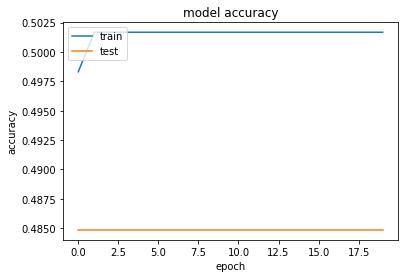

In [47]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()